<a href="https://colab.research.google.com/github/mailazorzan/sf_air-traffic-passengers/blob/main/sf_air_traffic_passenger.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# San Francisco Air Traffic Passenger



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("./drive/MyDrive/Portfolio/SF Air Traffic Passenger/data/Air_Traffic_Passenger_Statistics.csv")
df.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46670 entries, 0 to 46669
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Activity Period              46670 non-null  int64 
 1   Operating Airline            46670 non-null  object
 2   Operating Airline IATA Code  46519 non-null  object
 3   Published Airline            46670 non-null  object
 4   Published Airline IATA Code  46519 non-null  object
 5   GEO Summary                  46670 non-null  object
 6   GEO Region                   46670 non-null  object
 7   Activity Type Code           46670 non-null  object
 8   Price Category Code          46670 non-null  object
 9   Terminal                     46670 non-null  object
 10  Boarding Area                46670 non-null  object
 11  Passenger Count              46670 non-null  int64 
dtypes: int64(2), object(10)
memory usage: 4.3+ MB


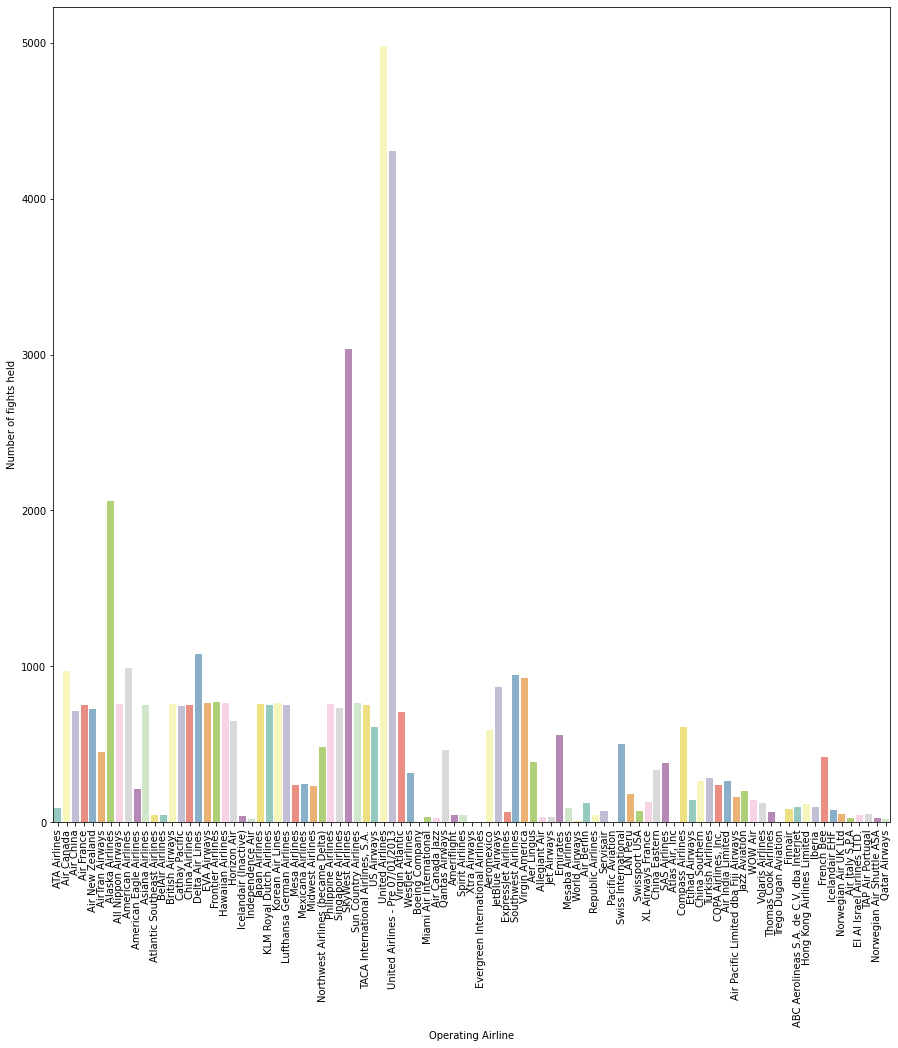

In [11]:
plt.figure(figsize = (15,15))
  sns.countplot(x = "Operating Airline", palette = "Set3",data = df)
plt.xticks(rotation = 90)
plt.ylabel("Number of fights held")
plt.show()

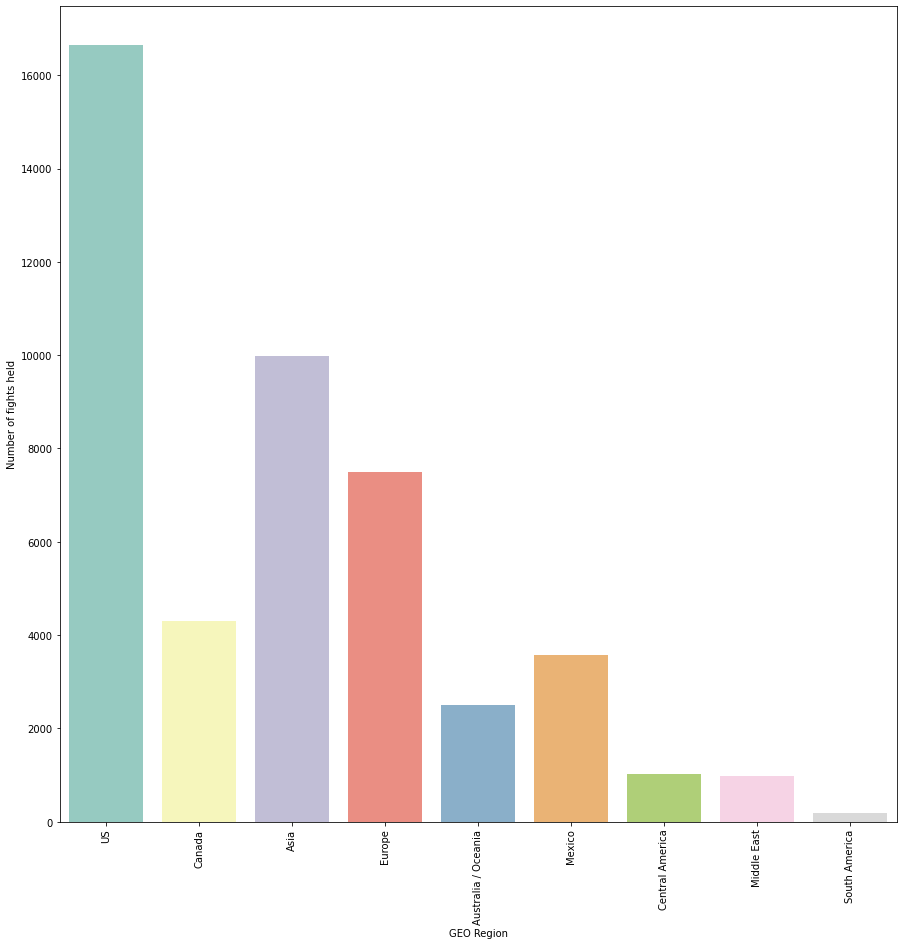

In [17]:
plt.figure(figsize = (15,15))
sns.countplot(x = "GEO Region", palette = "Set3",data = df)
plt.xticks(rotation = 90)
plt.ylabel("Number of fights held")
plt.show()

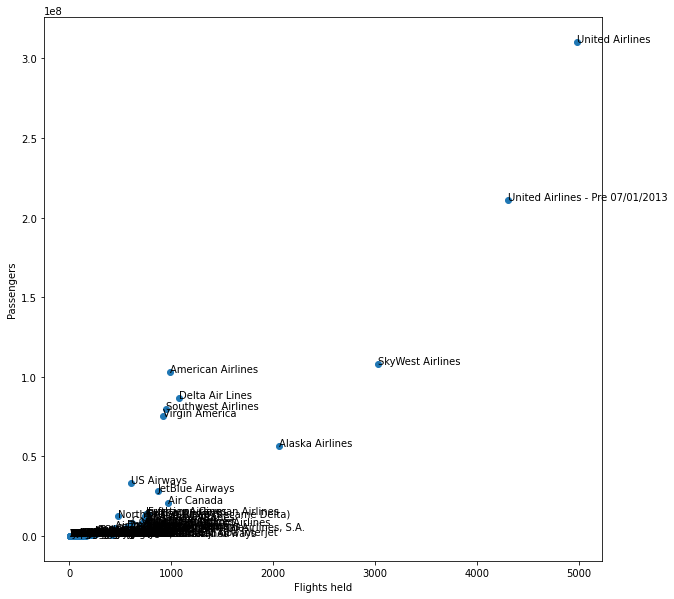

In [18]:
airline_count = df["Operating Airline"].value_counts()
airline_count.sort_index(inplace=True)
passenger_count = df.groupby("Operating Airline").sum()["Passenger Count"]
passenger_count.sort_index(inplace=True)
from sklearn.preprocessing import scale
x = airline_count.values
y = passenger_count.values
plt.figure(figsize = (10,10))
plt.scatter(x, y)
plt.xlabel("Flights held")
plt.ylabel("Passengers")
for i, txt in enumerate(airline_count.index.values):
    a = plt.gca()
    plt.annotate(txt, (x[i], y[i]))
plt.show()

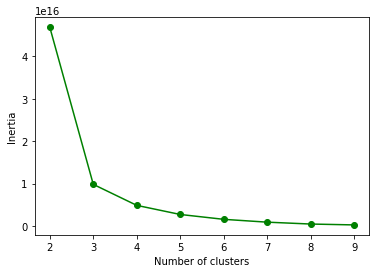

In [19]:
from sklearn.cluster import KMeans
X = np.array(list(zip(x,y)))
inertias = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)
plt.plot(range(2,10), inertias, "o-g")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()

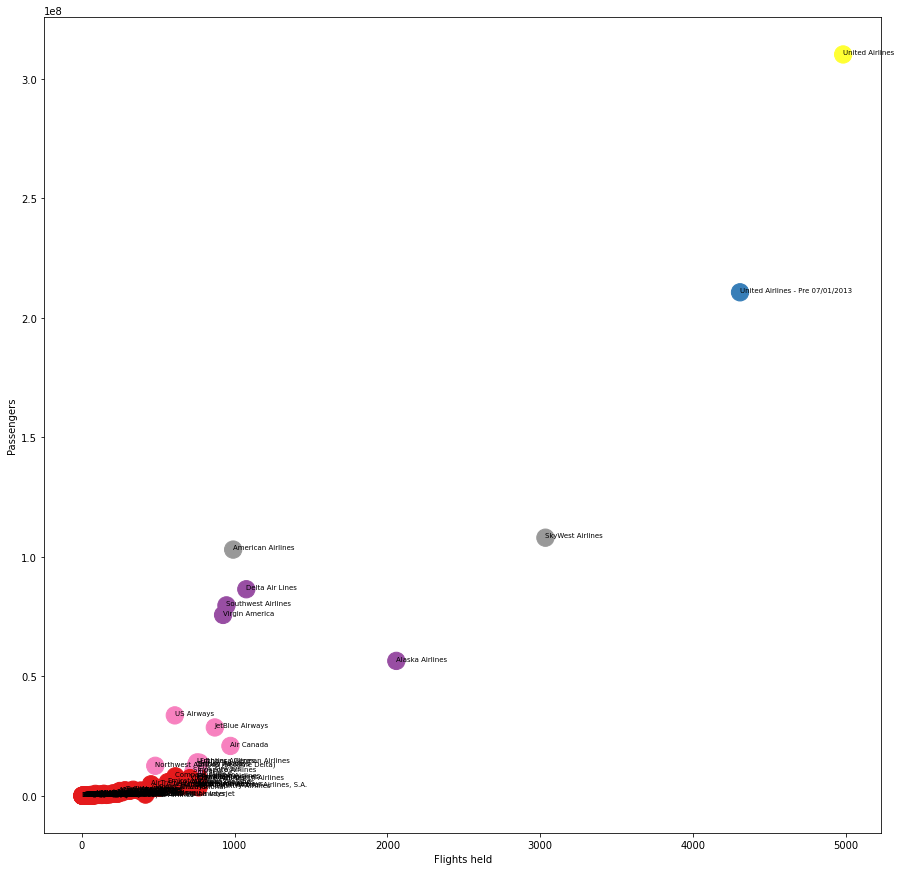

In [20]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
plt.figure(figsize = (15,15))
plt.xlabel("Flights held")
plt.ylabel("Passengers")
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=300, cmap='Set1')
for i, txt in enumerate(airline_count.index.values):
    plt.annotate(txt, (X[i,0], X[i,1]), size = 7)
plt.show()

The average silhouette_score is :0.7353332989253015


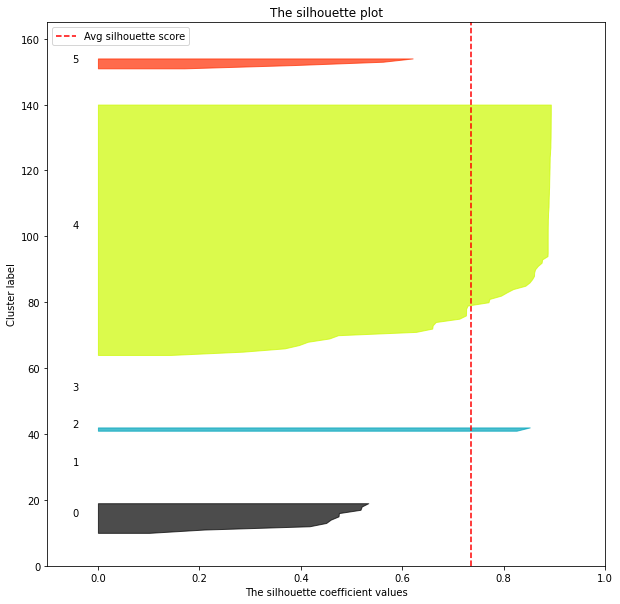

In [21]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
n_clusters = 6
plt.figure(figsize = (10,10))
plt.gca().set_xlim([-0.1,1])
plt.gca().set_ylim([0, len(X) + (n_clusters + 1) * 10])
clusterer = KMeans(n_clusters=n_clusters, random_state=10)
labels = clusterer.fit_predict(X)
print("The average silhouette_score is :{}".format(silhouette_score(X, labels)))
sample_silhouette_values = silhouette_samples(X, labels)
y_lower = 10
for i in range(n_clusters):
    ith_cluster_silhouette_values = \
    sample_silhouette_values[labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = cm.nipy_spectral(float(i) / n_clusters)
    plt.gca().fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
    plt.gca().text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10
plt.gca().axvline(x=silhouette_score(X, labels), color="red", linestyle="--", label = "Avg silhouette score")
plt.title("The silhouette plot")
plt.xlabel("The silhouette coefficient values")
plt.ylabel("Cluster label")
plt.legend()
plt.show()